In [76]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib
import os
import graphviz
import seaborn as sns
from matplotlib import pyplot as plt
from subprocess import call
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import grid_search
%matplotlib inline

#### Problem 1 (20 points): 

This problem illustrates the classification approach by using decision trees and the Lupus
data (download the data file “sledata” from D2L). The data consists of 300 patient records. Each record contains 12
elements. The first 11 elements stand for different symptoms and the final element of each record indicates the
diagnosis. Build a decision tree and answer these questions.


1) Build the best decision tree you can and explain what makes it the best. Show what criteria you used
including the number of cases allowed in parents and children and the depth and stopping condition.  
2) How many nodes does the final tree have and how many of them are terminal nodes?  
3) What are the most important three Lupus data features in building the tree? Explain your answer.  
4) Increase the parameters that let you set the number of cases allowed in parent and child nodes.   What do you
notice with the complexity (number of nodes) of the tree? Does it increase? Explain your answer.  

In [3]:
#Import data
sled_url = 'https://github.com/PixarJunkie/fundamentals-of-data-science/raw/master/data/sledata.txt'
sled_df = pd.read_table(sled_url, header = None, sep = " ")
sled_df.rename(columns = {11: 'label'}, inplace = True)
sled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,label
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,1,1


In [11]:
#Features and labels
X = sled_df.loc[:, sled_df.columns != 'label']
y = sled_df.loc[:, sled_df.columns == 'label']

#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

print('X_train size: ' + str(X_train.shape))
print('X_test size: ' + str(X_test.shape))
print('y_train size: ' + str(y_train.shape))
print('y_test size: ' + str(y_test.shape))

X_train size: (210, 11)
X_test size: (90, 11)
y_train size: (210, 1)
y_test size: (90, 1)


In [44]:
feature_names = list(X_train.columns)

In [81]:
#Decision Tree

labels = y_train.label
feature_lst = list(X_train.columns)

dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 20, random_state = 23)
dt = dt.fit(X_train, y_train)
export_graphviz(dt, out_file = 'tree.dot', feature_names = feature_lst)
call(["dot", "-Tpng", "tree.dot", "-o", "tree.png"])

# graph = graphviz.Source(dot_data)
# graph.render(dot_data)
# params = {'max_depth': list(range(3, 20))}
# clf = grid_search.GridSearchCV(DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None), param_grid = params, n_jobs = 4)
# clf.fit(X = X_train, y = labels)

# model = clf.best_estimator_
# print(clf.best_score_, clf.best_params_, clf.best_estimator_)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [88]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

        command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

In [90]:
graph = visualize_tree(dt, feature_lst)

#### Problem 2 (30 points): 

This problem illustrates the effect of the class imbalance of the accuracy of the decision
trees. Download the red wine quality data from the UCI machine learning repository at:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
(for a reminder of how to get this kind of data ready for SPSS, see Assignment 1)

1. Consider each quality level of wine to be a different class. Report how many classes there are and what is
the distribution of these classes for the red wine data (how many cases of each class are there).

2. Repeat Problem 1 on the red wine data.

3. Now bin the class variable in such a way that data is not so imbalanced with respect to the class variable.
Repeat Problem 1 but on the data you have processed with this smoothing.

4. How does the performance of the best classification model on the original class variable compare with the
accuracy of the best classification model on the binned classification variable?

5. Do you have any other ideas on how you can improve the results further?
Showing that your idea will actually work will be graded with five extra credit points.


In [92]:
white_url = 'https://raw.github.com/PixarJunkie/fundamentals-of-data-science/master/data/winequality-white.csv'
red_url = 'https://raw.github.com/PixarJunkie/fundamentals-of-data-science/master/data/winequality-red.csv'

white_df = pd.read_csv(white_url, sep = ';')
red_df = pd.read_csv(red_url, sep = ';')

##### Problem 2-1

There are 7 classes of quality in white_df.quality

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


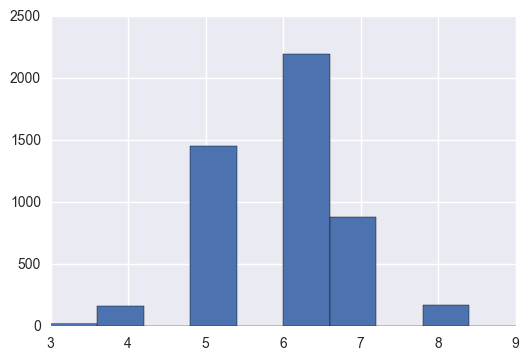

In [97]:
plt.hist(white_df.quality)
print(white_df.quality.value_counts())

##### Problem 2-2

There are 6 classes of quality in red_df.quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


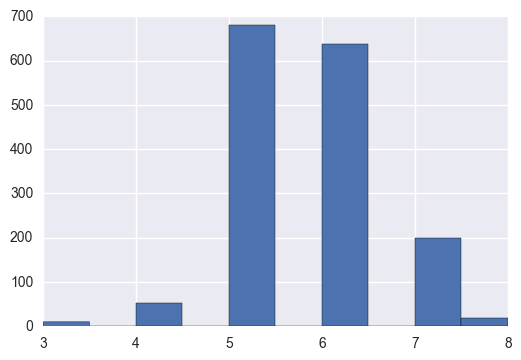

In [98]:
plt.hist(red_df.quality)
print(red_df.quality.value_counts())

#### Problem 3 (5 points): 

Differentiate between the following terms:

a. feature selection and feature extraction  
b. training and testing data  
c. parametric reduction techniques and non-parametric reduction techniques  
d. uniform binning and non-uniform binning  
e. covariance matrix and correlation matrix  